# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [70]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 576


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [21]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | la ronge
Processing Record 2 of Set 1 | mumbwa
Processing Record 3 of Set 1 | north battleford
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | longyearbyen
Processing Record 6 of Set 1 | miri
Processing Record 7 of Set 1 | baruun-urt
Processing Record 8 of Set 1 | gejiu
Processing Record 9 of Set 1 | antonio enes
Processing Record 10 of Set 1 | klyuchi
Processing Record 11 of Set 1 | alamogordo
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | invercargill
Processing Record 14 of Set 1 | carnarvon
Processing Record 15 of Set 1 | khorixas
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | nema
Processing Record 18 of Set 1 | bridgewater
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | drayton valley
Processing Record 22 of Set 1 | taiohae
City not found. Skipping

In [42]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [43]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,la ronge,55.1001,-105.2842,288.29,67,100,0.51,CA,1722829077
1,mumbwa,-14.9783,27.0619,286.91,31,0,1.90,ZM,1722829078
2,north battleford,52.7834,-108.2847,292.20,68,100,5.14,CA,1722829079
3,port-aux-francais,-49.3500,70.2167,274.82,68,13,6.12,TF,1722829081
4,longyearbyen,78.2186,15.6401,280.06,100,100,3.60,SJ,1722828909


In [45]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [46]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

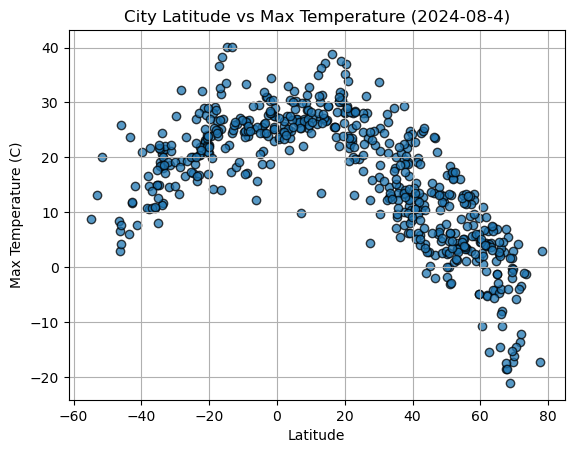

In [47]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", alpha=.75)

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature (2024-08-4)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

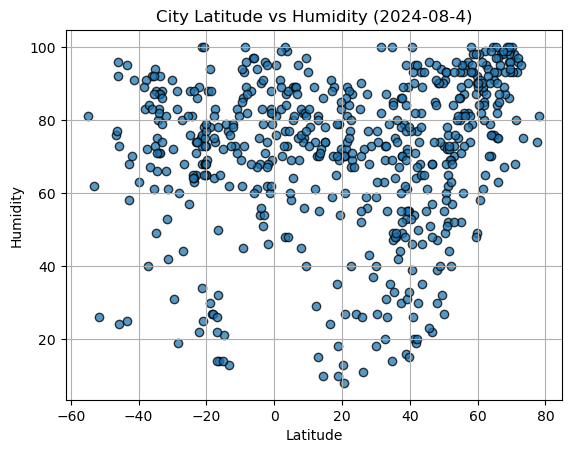

In [48]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", alpha=.75)

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (2024-08-4)")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

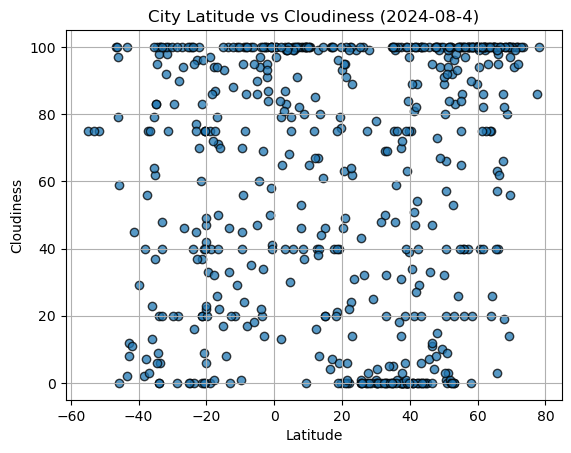

In [49]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black", alpha=.75)

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (2024-08-4)")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

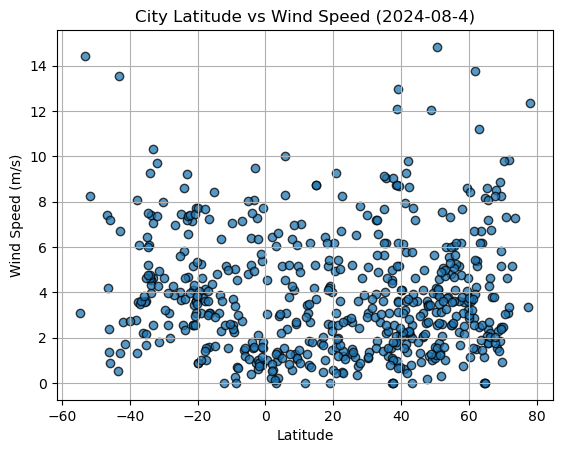

In [50]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", alpha=.75)

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (2024-08-4)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
(slope, intercept, rvalue, pvalue, stdder) = linregress(x_values, y_values)

In [51]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [52]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7161472181434125.


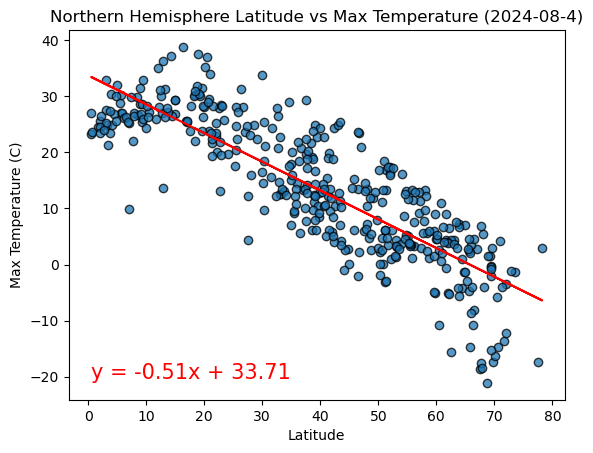

In [94]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.scatter(x_values, y_values, marker="o", edgecolors="black", alpha=.75)

# Incorporate the other graph properties
plt.title("Northern Hemisphere Latitude vs Max Temperature (2024-08-4)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")

(slope, intercept, rvalue, pvalue, stdder) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.text(x_values.min(), y_values.min(), line_eq, fontsize=15, color='red', verticalalignment='bottom')
print(f"The r^2-value is: {rvalue**2}.")
plt.show()

The r^2-value is: 0.4121057168607252.


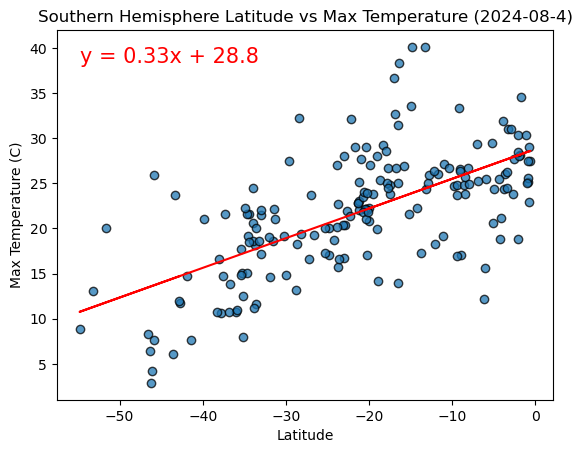

In [74]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.scatter(x_values, y_values, marker="o", edgecolors="black", alpha=.75)

# Incorporate the other graph properties
plt.title("Southern Hemisphere Latitude vs Max Temperature (2024-08-4)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")

(slope, intercept, rvalue, pvalue, stdder) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.text(x_values.min(), y_values.max(), line_eq, fontsize=15, color='red', verticalalignment='top')
print(f"The r^2-value is: {rvalue**2}.")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
The relationship between latitude and temperature offers perhaps the stongest suggestion of correlation of all the graphs here. The northern hemisphere's r-squared value is above 7, suggesting a strong the correlation between the two factors, while the southern hemisphere suddests a moderate correlation. Though one might expect similar strengths of correlation, the lack of cities, and therefore datapoints, at extremely southern latitudes limits the amount of data in our dataset not only in overall datapoints, but also in the scope of the data; we can see that while the northern hemisphere's latitude ranges from 0 to 80, southern hemisphere only ranges from 0 to -60. This smaller dataset would make it less likely for us to get a strong correlation for the given sample in the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.05689741545789608.


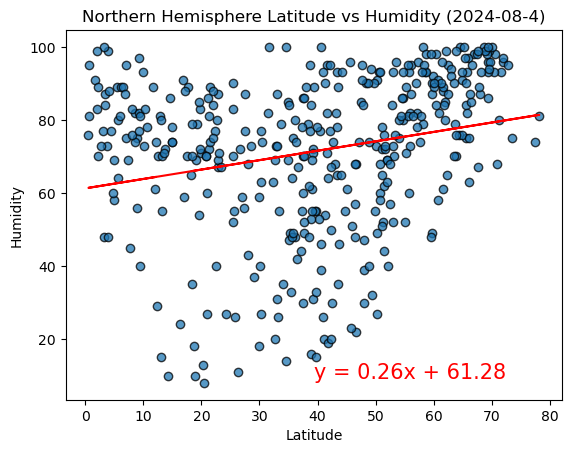

In [82]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.scatter(x_values, y_values, marker="o", edgecolors="black", alpha=.75)

# Incorporate the other graph properties
plt.title("Northern Hemisphere Latitude vs Humidity (2024-08-4)")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

(slope, intercept, rvalue, pvalue, stdder) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.text(x_values.mean(), y_values.min(), line_eq, fontsize=15, color='red', verticalalignment='bottom')
print(f"The r^2-value is: {rvalue**2}.")
plt.show()

The r^2-value is: 0.0002808747046324618.


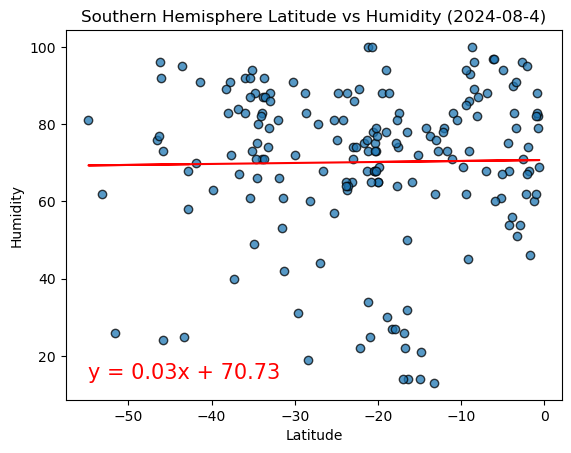

In [77]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.scatter(x_values, y_values, marker="o", edgecolors="black", alpha=.75)

# Incorporate the other graph properties
plt.title("Southern Hemisphere Latitude vs Humidity (2024-08-4)")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

(slope, intercept, rvalue, pvalue, stdder) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.text(x_values.min(), y_values.min(), line_eq, fontsize=15, color='red', verticalalignment='bottom')
print(f"The r^2-value is: {rvalue**2}.")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
The correlation between latitude and humidity is more difficult to determine. The northern hemisphere has a r-squared value of .05, which suggestly hardly any correlation, and the southern hemisphere's r-spuared value is close to zero, suggesting besically no more correlation than a randomly assembled group of coordinates. Though there is some evidence of correlation in the northern hemisphere after 40 degrees latitude: we can notice an upward trend and a series of tightly spaced datapoints in the upper right-hand region of the map. I wonder if we would get a stonger correlation if we were to compare altitude to humidity, rather than latitude alone.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.024026517125811043.


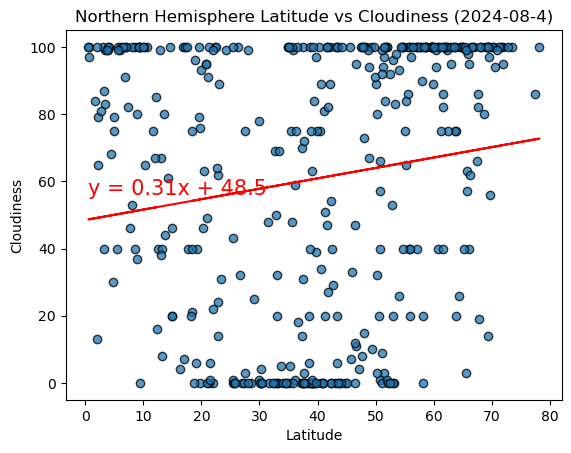

In [86]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.scatter(x_values, y_values, marker="o", edgecolors="black", alpha=.75)

# Incorporate the other graph properties
plt.title("Northern Hemisphere Latitude vs Cloudiness (2024-08-4)")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

(slope, intercept, rvalue, pvalue, stdder) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.text(x_values.min(), y_values.mean(), line_eq, fontsize=15, color='red', verticalalignment='top')
print(f"The r^2-value is: {rvalue**2}.")
plt.show()

The r^2-value is: 0.020567354299943663.


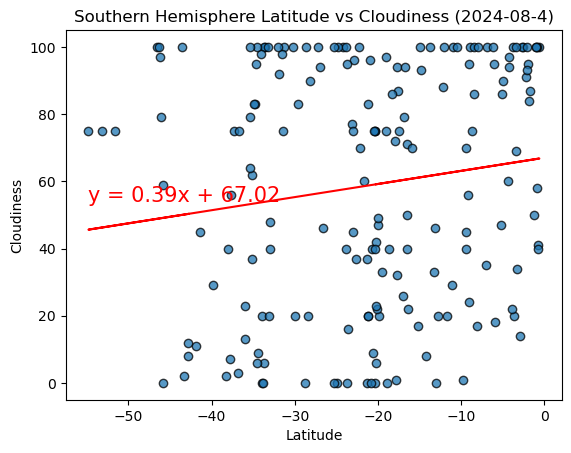

In [90]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.scatter(x_values, y_values, marker="o", edgecolors="black", alpha=.75)

# Incorporate the other graph properties
plt.title("Southern Hemisphere Latitude vs Cloudiness (2024-08-4)")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

(slope, intercept, rvalue, pvalue, stdder) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.text(x_values.min(), y_values.mean(), line_eq, fontsize=15, color='red', verticalalignment='top')
print(f"The r^2-value is: {rvalue**2}.")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
Both hemispheres have an r-squared value of around 0.02 when comparing latitude and cloudiness, which does not suggest any real correlation. Part of what might have the data difficult to show correlation is the fact that the maximum and minimum and stationary, and as such we can see and larger amount of datapoints at each extreme, which would have a negative effect on a high r-squared value. Furthermore, the hemispheres seem to suggest a trend; the further north you go, the cloudier it is. This could have something to do with the time of year, but again, with an r-squared value of .02, it isn't really worth looking into.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.030396762354449484.


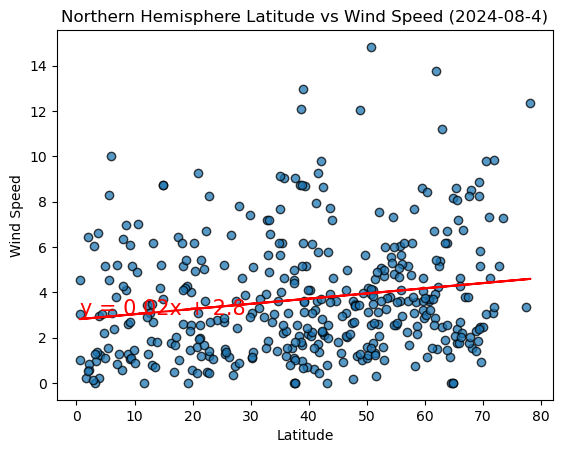

In [92]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.scatter(x_values, y_values, marker="o", edgecolors="black", alpha=.75)

# Incorporate the other graph properties
plt.title("Northern Hemisphere Latitude vs Wind Speed (2024-08-4)")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

(slope, intercept, rvalue, pvalue, stdder) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.text(x_values.min(), y_values.mean(), line_eq, fontsize=15, color='red', verticalalignment='top')
print(f"The r^2-value is: {rvalue**2}.")
plt.show()

The r^2-value is: 0.06223904070051575.


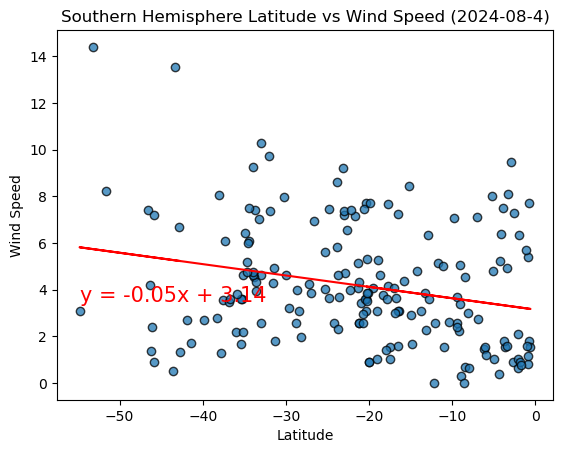

In [91]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.scatter(x_values, y_values, marker="o", edgecolors="black", alpha=.75)

# Incorporate the other graph properties
plt.title("Southern Hemisphere Latitude vs Wind Speed (2024-08-4)")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

(slope, intercept, rvalue, pvalue, stdder) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.text(x_values.min(), y_values.mean(), line_eq, fontsize=15, color='red', verticalalignment='top')
print(f"The r^2-value is: {rvalue**2}.")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
Latitude and wind speed also do not offer any strong opportunities for data extrapulation with respective r-squared values of .03 for the northern hemisphere and .06 for the southern. Perhaps looking a the datapoint of highest wind speed would give a more statistically significant result, but ultimately, this data suggests that we should look elsewhere besides latitude to find a strong correlation with wind speed.